## imports

In [1]:
from PIL import Image
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare Image

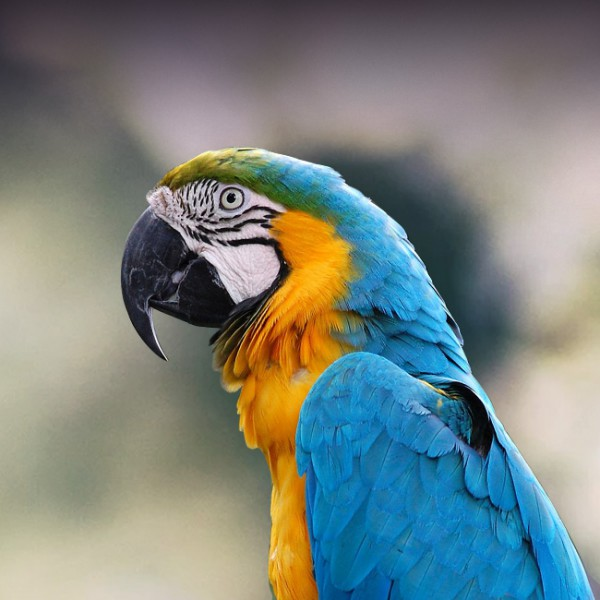

In [2]:
image = Image.open('parrot.jpg')
image

In [3]:
image = np.array(image)
# Flatten the image to have shape (num_pixels, 3)
pixels = image.reshape(-1, 3)
pixels.shape

(360000, 3)

## Read Color Palettes

In [4]:
# Function to convert a hexadecimal color string to RGB format
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    return tuple(int(hex_color[i:i + 2], 16) for i in (0, 2, 4))

# List to store the RGB color arrays
color_arrays = []

# Open and read the text file
file_path = "colors.txt"  # Replace with the actual file path
# the txt file contains colors in a hex format
# the palettes can be found in UI websites

with open(file_path, "r") as file:
    for line in file:
        # Remove leading/trailing whitespace and brackets, split by comma
        color_hex_values = line.strip('[]\n').replace('"','').split(",")
        # Convert hexadecimal values to RGB and append to the list
        rgb_colors = [hex_to_rgb(hex_color.strip()) for hex_color in color_hex_values]
        color_arrays.append(rgb_colors)

In [5]:
palettes = [[np.array(p) for p in palette]  for palette in color_arrays]
print('Number of color palette found : ',len(palettes))

Number of color palette found :  21


In [6]:
def plot_palette(predefined_palette,index = 0):
    p = [c /255. for c in predefined_palette]
    fig, ax = plt.subplots(figsize=(8, 2))
    for i, color in enumerate(p):
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

    ax.set_xlim(0, len(p))
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.title(f'Palette {index}')
    plt.show()

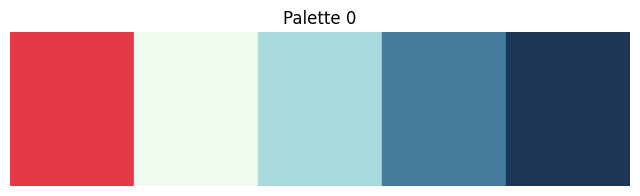

In [7]:
p = palettes[0]
plot_palette(p)

## Style Images

In [8]:
def styled_image(pixels,p):
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(p, np.arange(len(p)))  # Assign a unique label to each color

    # Predict the nearest color for each pixel
    predicted_labels = knn_model.predict(pixels)

    # Map the labels back to the predefined palette colors
    output_image = np.array(p)[predicted_labels].reshape(image.shape)
    return output_image

def plot_images(styles):
    num_images = len(styles)
    num_rows = (num_images + 1) // 2
    num_cols = 2

    # Create a figure and subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 50))
    axes = axes.flat

    # Loop through the images and plot them
    for i, (img, ax) in enumerate(zip(styles, axes)):
        ax.imshow(img)  # Use plt.imshow() to display the image
        ax.axis('off')
        if i == 0 :
          ax.set_title('Originale')
        else:
          ax.set_title(f'Palette {i-1}')

    plt.tight_layout()
    plt.show()

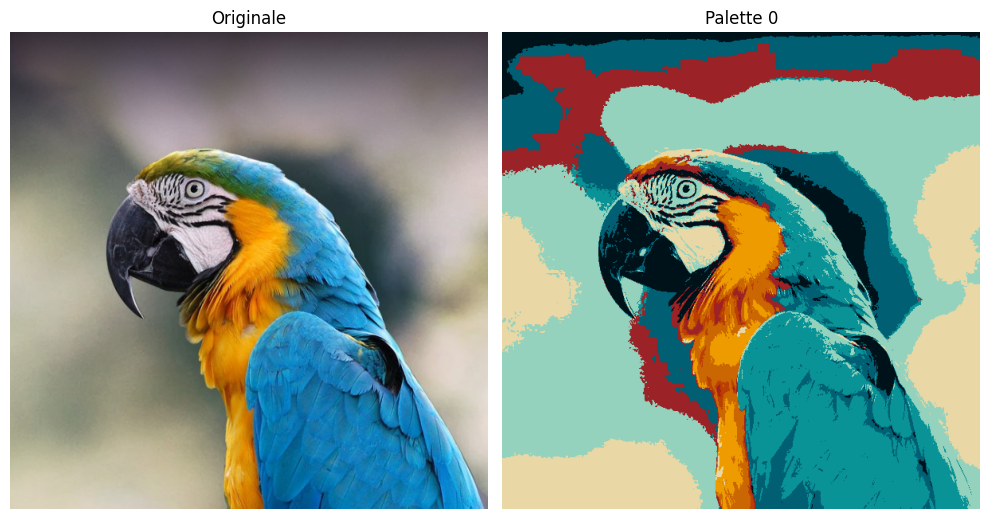

CPU times: user 19.4 s, sys: 1.23 s, total: 20.6 s
Wall time: 22.4 s


In [10]:
%%time
styles = []
styles.append(image)
p = palettes[1]
styles.append(styled_image(pixels,p))
plot_images(styles)

## Try different Palettes

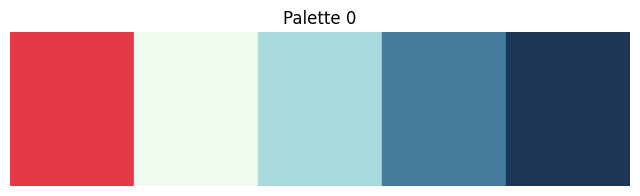

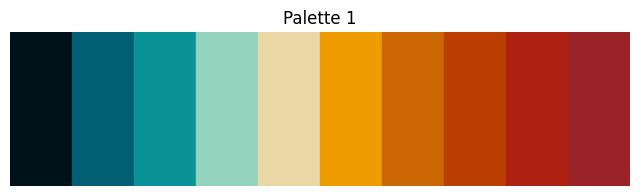

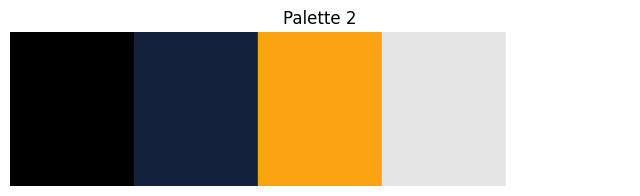

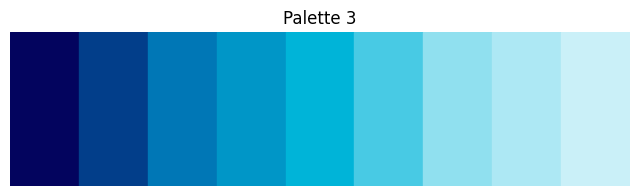

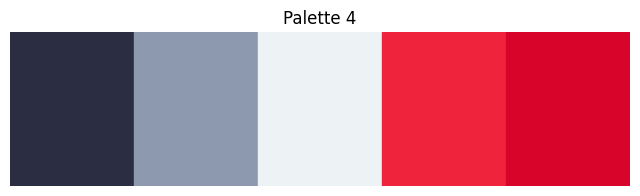

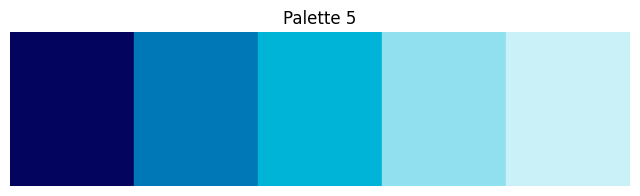

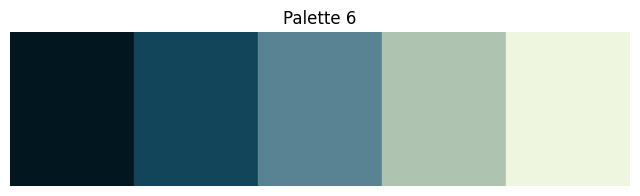

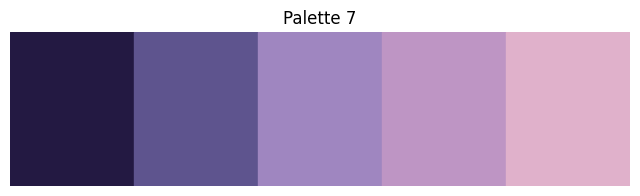

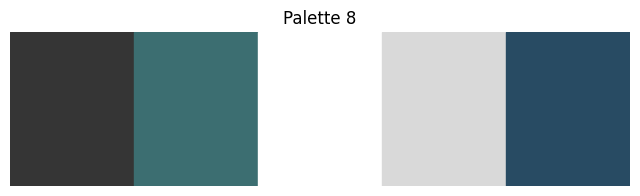

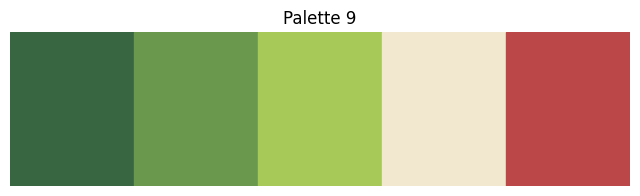

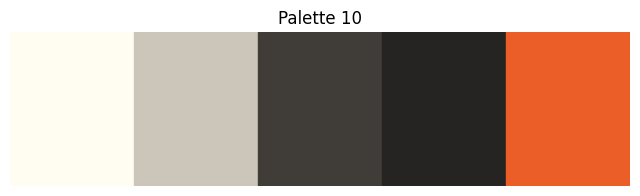

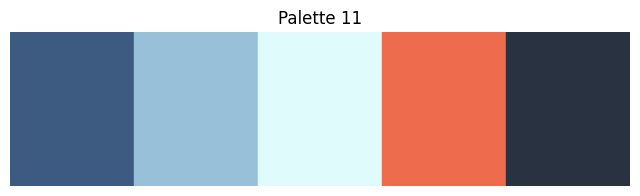

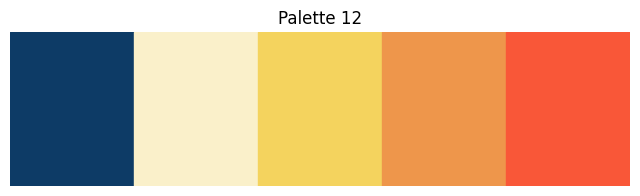

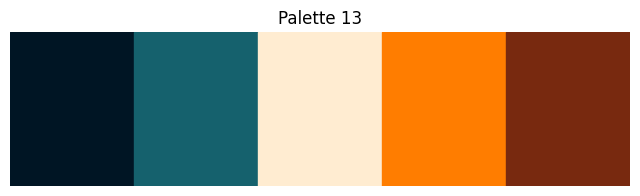

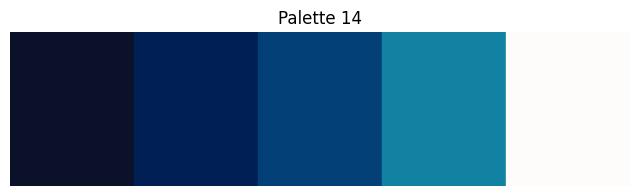

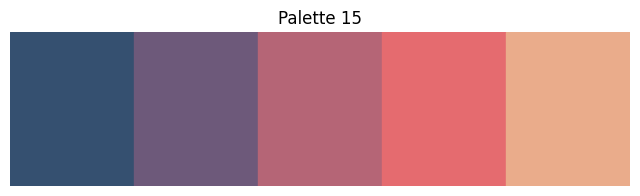

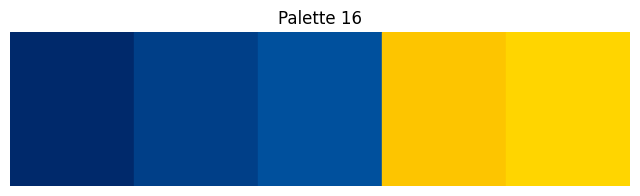

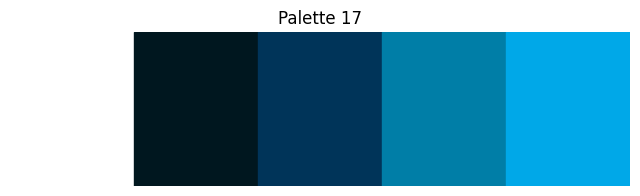

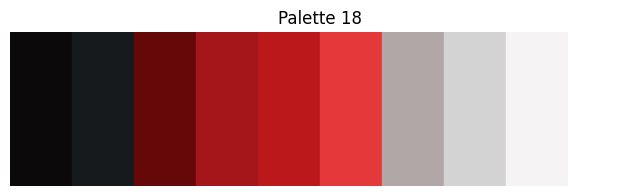

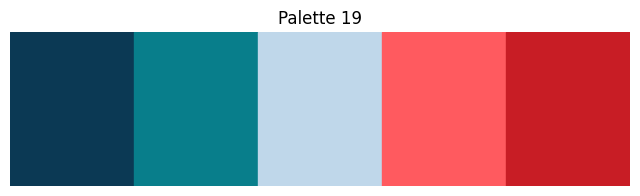

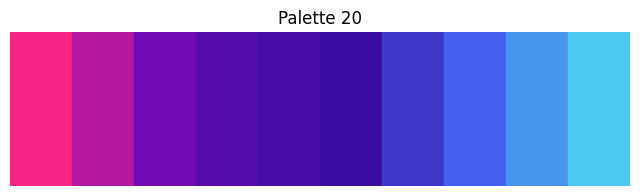

In [ ]:
for i,p in enumerate(palettes):
  plot_palette(p,i)

In [ ]:
# Group Styled Images in a list
styles = []
styles.append(image)
for p in palettes:
  styles.append(styled_image(pixels,p))

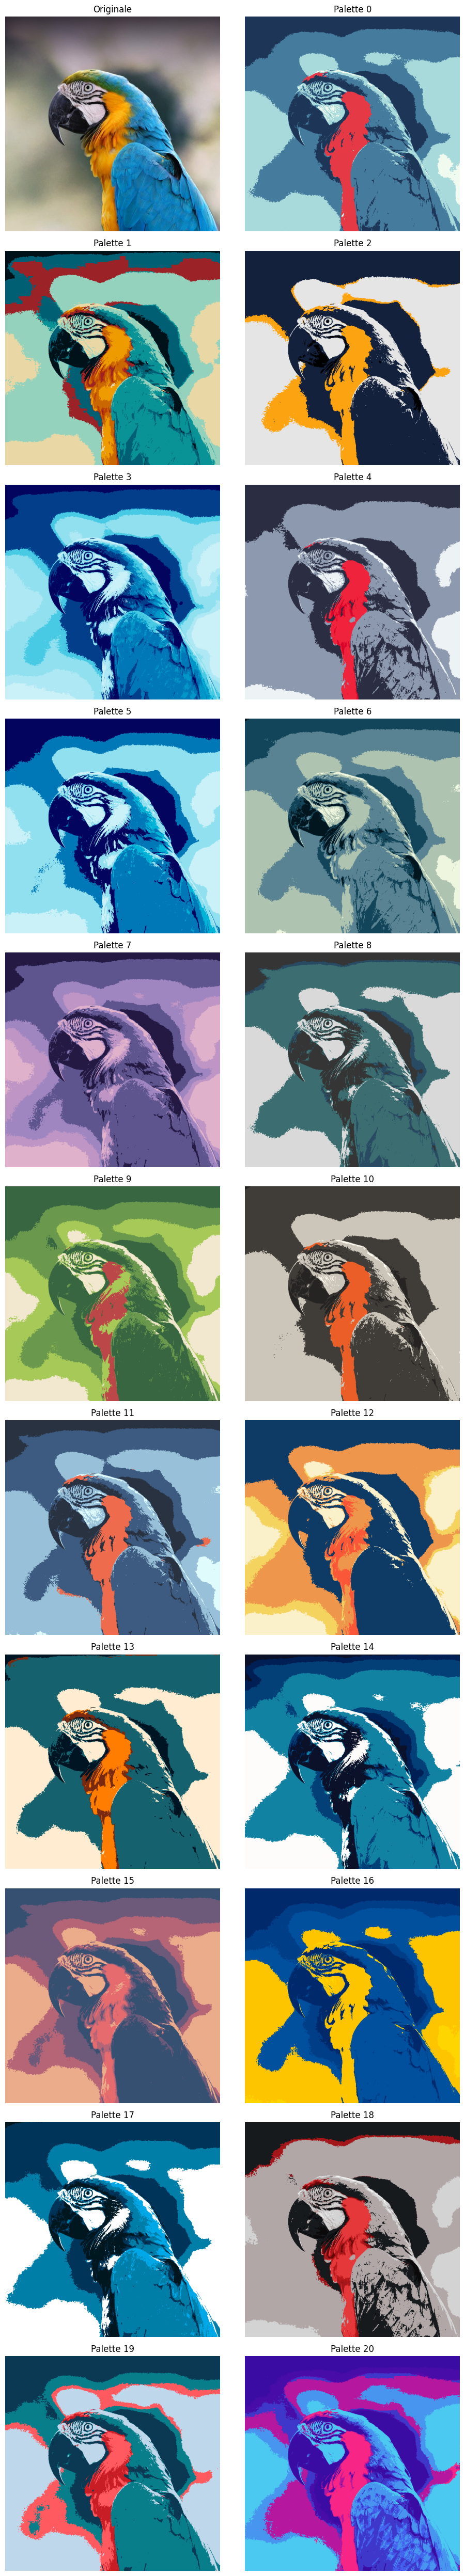

In [ ]:
plot_images(styles)